## Name: Marwan Ahmed Hassen Ali
## ID: 22
## Email: marwanhasssen999@gmail.com

In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## 1. Reading the Dataset:


In [289]:
df = pd.read_csv("P1_Churn_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [290]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [291]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [292]:
# Drop irrelevant columns (RowNumber, CustomerId, Surname)
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

## 2.  Data Visualization:

> ####  2.1 Distribution of numerical features

<Figure size 1200x800 with 0 Axes>

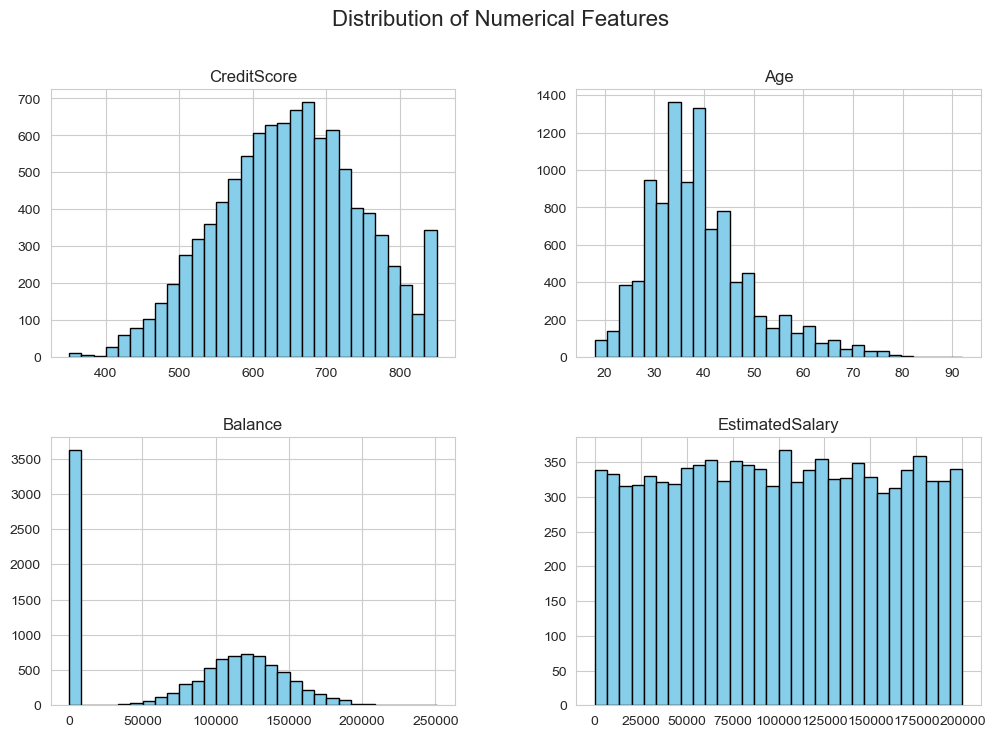

In [295]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
num_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
df[num_features].hist(bins=30, figsize=(12, 8), layout=(2, 2), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

> ####  2.2 Categorical feature distributions 

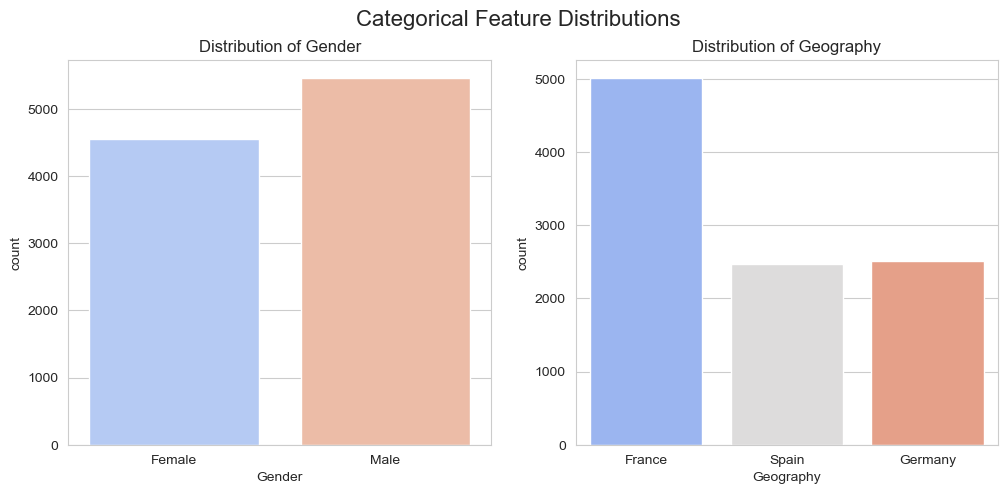

In [297]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="Gender", data=df, hue="Gender", palette="coolwarm", legend=False)
plt.title("Distribution of Gender")
plt.subplot(1, 2, 2)
sns.countplot(x="Geography", data=df, hue="Geography", palette="coolwarm", legend=False)
plt.title("Distribution of Geography")
plt.suptitle("Categorical Feature Distributions", fontsize=16)
plt.show()

> ####  2.3 Correlation heatmap to identify relationships between features.

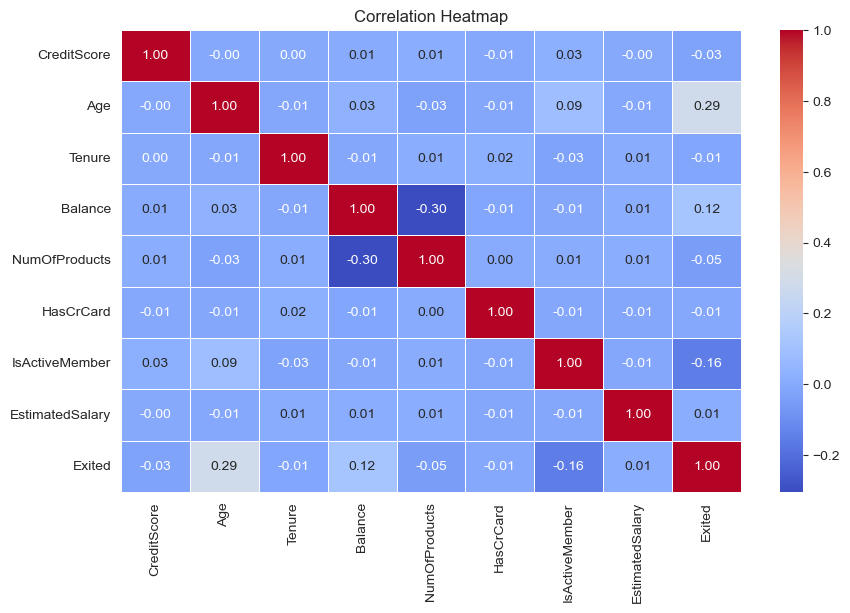

In [299]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

> #### 2.4 Distribution of the target variable (Exited) to check for class imbalance.

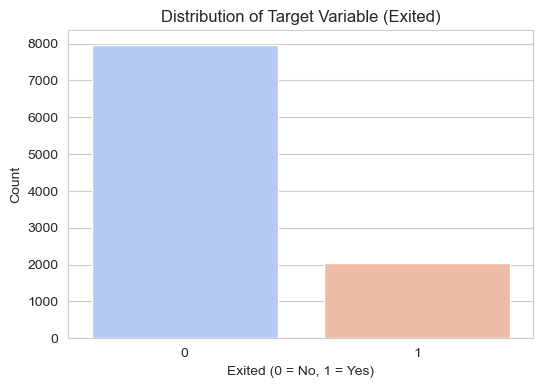

In [301]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Exited", data=df,hue = "Exited", palette="coolwarm", legend = False )
plt.title("Distribution of Target Variable (Exited)")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## 3. Feature Engineering:

In [303]:
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)  # One-Hot Encoding
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})  # Label Encoding
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
8463,526,1,49,2,0.00,1,1,0,114539.67,1,False,True
114,721,1,28,9,154475.54,2,0,1,101300.94,1,True,False
1019,633,1,31,1,0.00,1,1,0,48606.71,0,False,False
8901,586,1,51,2,138553.57,1,1,1,92406.22,0,False,False
1330,640,0,46,8,0.00,2,1,0,89043.19,0,False,True


## 4. Splitting the Dataset:

In [305]:
X = df.drop("Exited", axis=1)  # Features (all columns except target)
y = df["Exited"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (8000, 11) (8000,)
Testing Set: (2000, 11) (2000,)


## 5. Oversampling (if needed) ---> it's needed :

In [307]:
smote = SMOTE(sampling_strategy="auto", random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Exited
0    6370
1    1630
Name: count, dtype: int64
After SMOTE: Exited
1    6370
0    6370
Name: count, dtype: int64


## 6. Feature Standardization:


In [309]:
scaler = StandardScaler()

# Apply standardization only on numerical features (excluding categorical ones)
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  

X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_resampled_scaled.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,1.135396,1.173777,1.600783,0.787428,-1.348935,-0.728277,0.776998,-0.765221,1.017874,-0.763288,-0.632577
1,0.982531,1.173777,-0.893185,-0.680932,0.327477,-0.728277,0.776998,-0.765221,-0.641256,1.310121,-0.632577
2,1.157234,-0.851950,-0.394392,-1.782201,0.520137,1.037663,0.776998,1.306812,0.286786,1.310121,-0.632577
3,-0.961044,1.173777,-0.394392,0.053248,-1.348935,1.037663,0.776998,-0.765221,-0.309202,-0.763288,-0.632577
4,0.469340,1.173777,0.802713,0.420338,0.465561,1.037663,-1.287004,1.306812,0.114377,1.310121,-0.632577


## 7. Model Evaluation:

In [326]:
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),  # For ROC-AUC
    "Decision Tree": DecisionTreeClassifier()
}

# Function to train and evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {
        "Model": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1 Score": [],
        "ROC-AUC": []
    }
    for model_name, model in models.items():
       
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        
        results["Model"].append(model_name)
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1 Score"].append(f1)
        results["ROC-AUC"].append(roc_auc)
        
    return pd.DataFrame(results)

evaluation_results = evaluate_models(models, X_train_resampled_scaled, y_train_resampled, X_test_scaled, y_test)

print(evaluation_results)


           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0            KNN    0.7785   0.466038  0.606880  0.527215  0.775404
1    Naive Bayes    0.7540   0.422018  0.565111  0.483193  0.764154
2            SVM    0.8085   0.524291  0.636364  0.574917  0.838989
3  Decision Tree    0.7520   0.418647  0.562654  0.480084  0.681515


## 8. Comparing Algorithms:

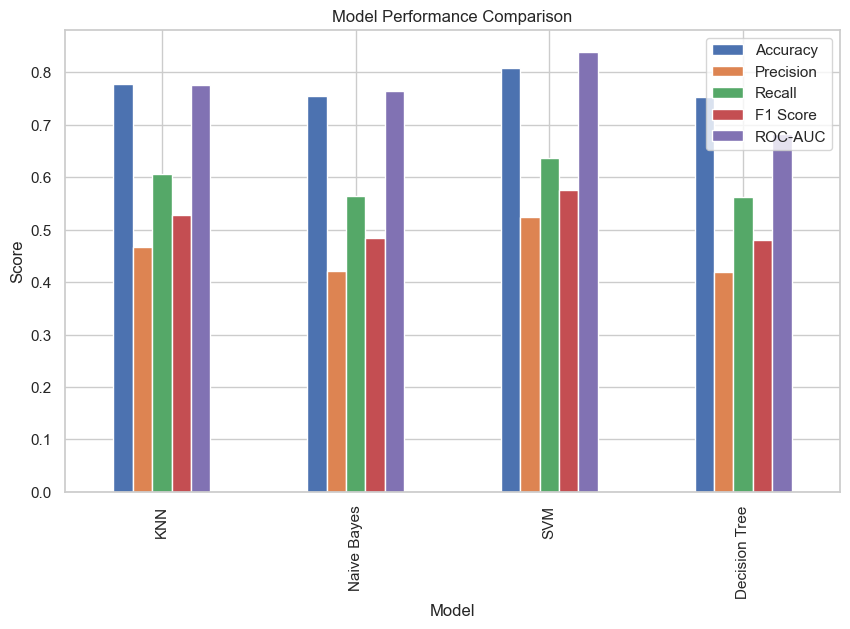

In [328]:
sns.set(style="whitegrid")
evaluation_results.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.show()

# Conclusion : SVM is the best model 